# Stock Price Prediction 

### Contents

## 1. Importing Required Libraries 

Load Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 





In [3]:
# The Below Commond Sets The Backend Of Matplotlib To The "inline" Backend 
# It Means The Output Of Plotting Commands Is Displayed inline 
%matplotlib inline 

# 2. Loading The Data 

##### 2.1. Reading And Viewing The Dataset Using Pandas 

In [4]:
df = pd.read_csv("ADANIPORTS.csv")

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,11/27/2007,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15,NaN,9859619,0.3612
1,11/28/2007,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14,NaN,1453278,0.3172
2,11/29/2007,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14,NaN,1069678,0.2088
3,11/30/2007,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14,NaN,1260913,0.2735
4,12/3/2007,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [5]:
# View The Dimension Of Data (df)
df.shape 

(3322, 15)

##### 2.2 Understanding The Data 

# 3. Data Preproccesing 

##### 3.1. Data Statistics 

In [6]:
# View DataFrame Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [7]:
# View Descriptive Statistics 

df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415860e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817652e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836045e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158525e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160990e+15,1.205984e+06,2.241652e+07,0.979800


In [8]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
# Checking For Null Value 
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [10]:
# install missingno 
# ! pip install missingno

Text(0, 0.5, 'Count')

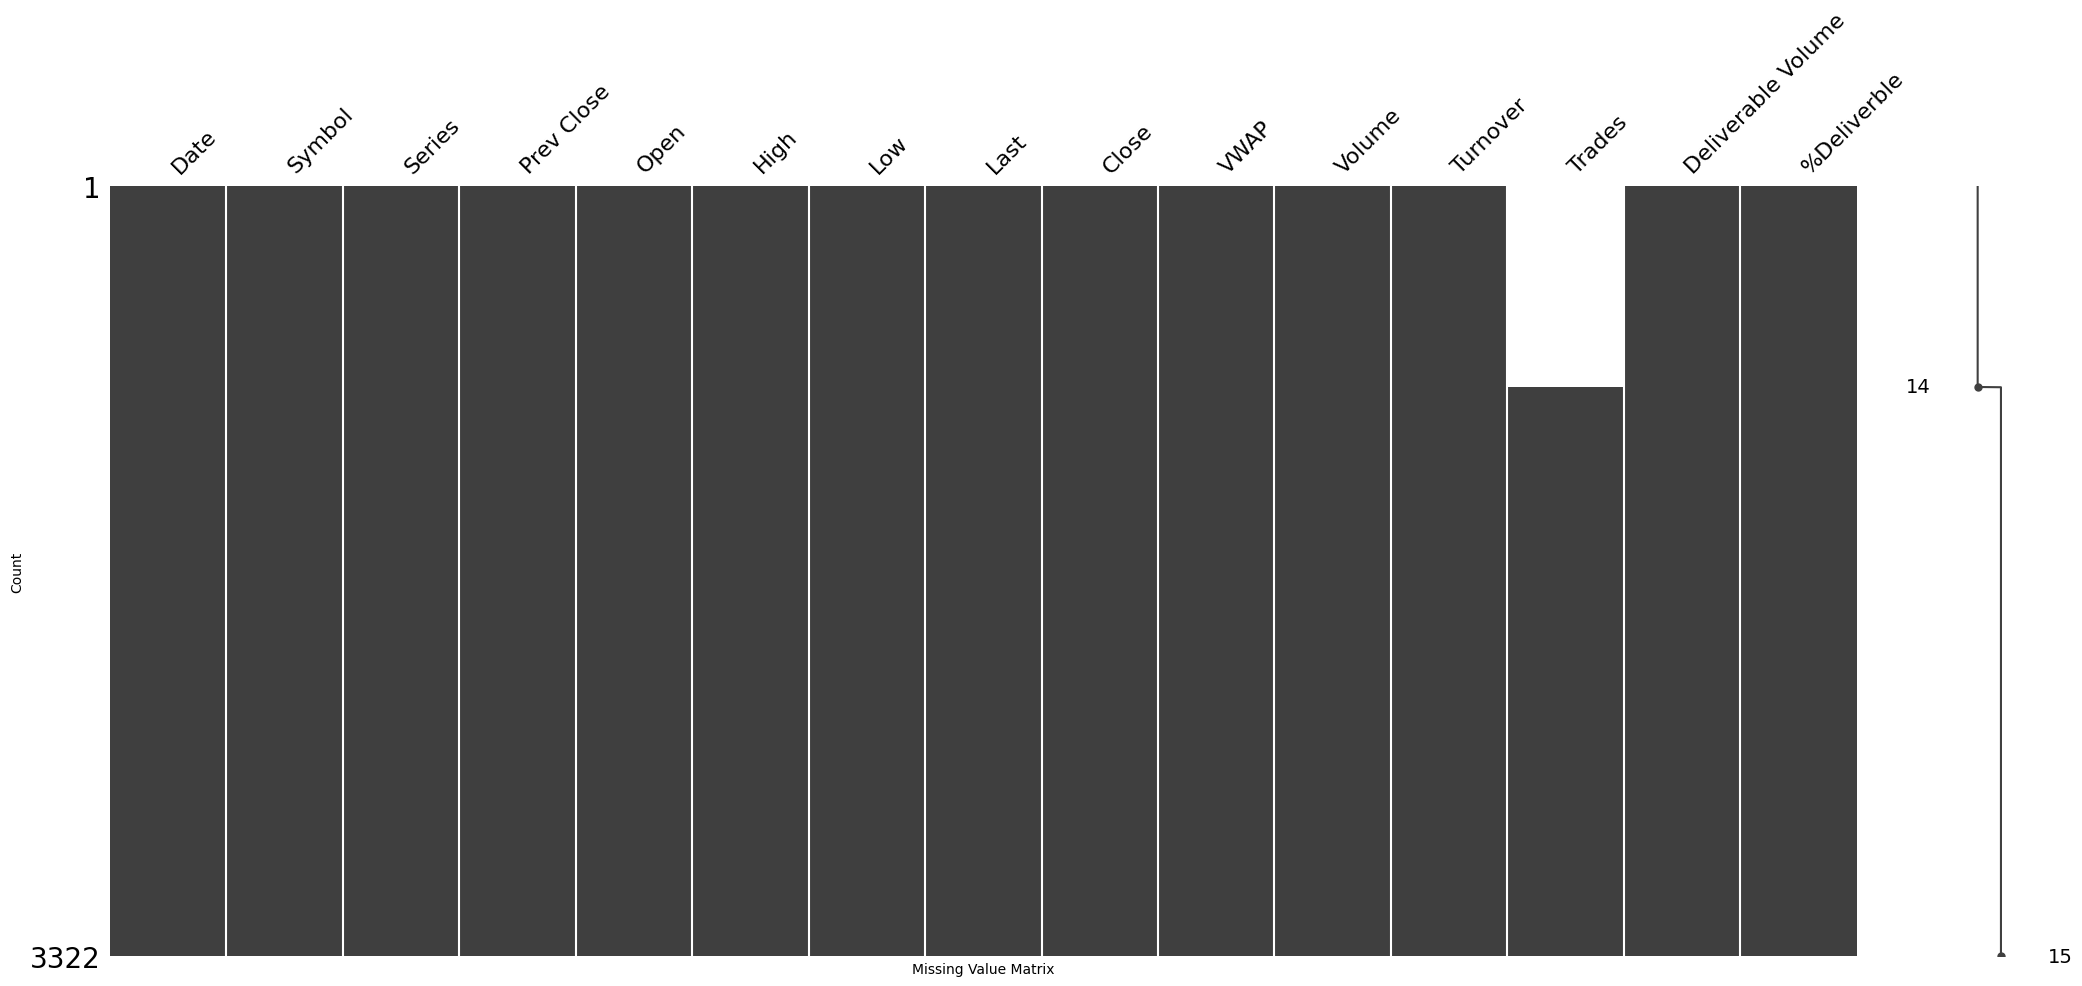

In [11]:
# Visualizing Missing Data 

import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

In [12]:
df.tail(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3312,4/16/2021,ADANIPORTS,EQ,750.35,750.90,794.85,743.00,749.15,755.50,770.01,41791181,3.217940e+15,499686.0,3455564,0.0827
3313,4/19/2021,ADANIPORTS,EQ,755.50,715.00,730.90,707.45,719.00,720.95,721.84,22935238,1.655550e+15,290362.0,3547157,0.1547
3314,4/20/2021,ADANIPORTS,EQ,720.95,744.70,745.90,710.00,721.00,720.45,729.05,21315167,1.553980e+15,243616.0,2001506,0.0939
3315,4/22/2021,ADANIPORTS,EQ,720.45,689.50,744.90,689.50,736.45,737.80,727.53,26840536,1.952730e+15,325317.0,2446278,0.0911
3316,4/23/2021,ADANIPORTS,EQ,737.80,736.45,746.90,720.10,725.10,725.35,733.59,18435449,1.352400e+15,204435.0,1361968,0.0739
3317,4/26/2021,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.20,730.75,733.25,9390549,6.885660e+14,116457.0,838079,0.0892
3318,4/27/2021,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.60,749.15,747.67,20573107,1.538190e+15,236896.0,1779639,0.0865
3319,4/28/2021,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.40,746.25,751.02,11156977,8.379110e+14,130847.0,1342353,0.1203
3320,4/29/2021,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.40,746.75,753.06,13851910,1.043140e+15,153293.0,1304895,0.0942
3321,4/30/2021,ADANIPORTS,EQ,746.75,739.00,759.45,724.50,726.40,730.05,743.35,12600934,9.366910e+14,132141.0,3514692,0.2789


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687720e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312770e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550660e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283260e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885660e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538190e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379110e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043140e+15,153293.0,1304895,0.0942


##### 3.2. Let's Take Any One Year's Data From The Datasets And Name It As Stockprice_One_Year. Use This Newly Created DataFrame For The Future Analysis

In [16]:
Stockprice_One_Year = df[(df["Date"]>'2011-03-31')&(df["Date"]<"2012-04-01")]
Stockprice_One_Year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643330e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638710e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448210e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614920e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360850e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325450e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080280e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459160e+13,29996.0,1933482,0.6739


In [17]:
Stockprice_One_Year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [18]:
Stockprice_One_Year.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,2011-10-01 21:06:30.361445888,144.573293,144.885141,147.858635,141.528916,144.489357,144.544578,144.662289,1.535630e+06,2.207001e+13,13896.727273,9.089178e+05,0.534747
min,2011-04-01 00:00:00,114.700000,117.500000,120.900000,111.000000,115.000000,114.700000,115.900000,2.209200e+04,3.235360e+11,417.000000,9.831000e+03,0.186900
25%,2011-07-01 00:00:00,135.600000,135.000000,137.950000,131.950000,135.000000,135.500000,135.080000,7.216570e+05,1.043460e+13,8995.000000,3.379690e+05,0.438000
50%,2011-09-30 00:00:00,146.800000,147.100000,149.800000,143.750000,146.600000,146.800000,146.690000,1.145520e+06,1.675320e+13,12293.000000,6.325790e+05,0.542200
75%,2012-01-03 00:00:00,154.750000,155.050000,157.750000,151.650000,154.400000,154.750000,155.010000,1.744030e+06,2.530020e+13,17565.000000,1.029768e+06,0.620800
max,2012-03-30 00:00:00,165.000000,165.050000,170.450000,163.550000,165.400000,165.000000,166.370000,2.066316e+07,3.322890e+14,46546.000000,1.726969e+07,0.943300
std,NaN,12.124482,12.221643,12.205498,12.348991,12.179215,12.151759,12.291169,1.673377e+06,2.535778e+13,7357.804577,1.350635e+06,0.137184


In [19]:
Stockprice_One_Year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 826 to 1074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                249 non-null    datetime64[ns]
 1   Symbol              249 non-null    object        
 2   Series              249 non-null    object        
 3   Prev Close          249 non-null    float64       
 4   Open                249 non-null    float64       
 5   High                249 non-null    float64       
 6   Low                 249 non-null    float64       
 7   Last                249 non-null    float64       
 8   Close               249 non-null    float64       
 9   VWAP                249 non-null    float64       
 10  Volume              249 non-null    int64         
 11  Turnover            249 non-null    float64       
 12  Trades              209 non-null    float64       
 13  Deliverable Volume  249 non-null    int64         
 

# 4. Data Visualization  

##### 4.1. Let's Compare Stockprice_One_Year['feature_name'].plot() vs df['feature_name'].plot()  

<Axes: xlabel='Date'>

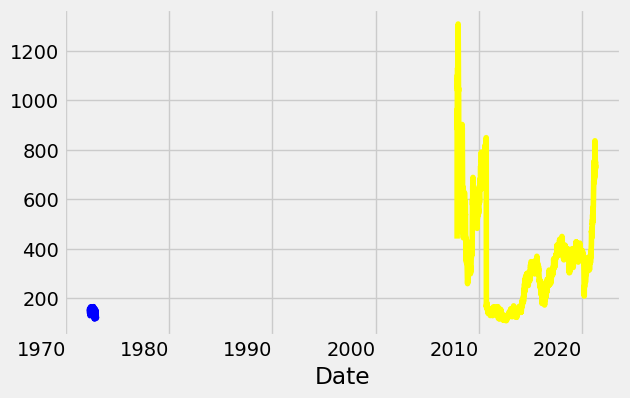

In [63]:
pl = df['Prev Close'].plot(c="yellow")
Stockprice_One_Year['Prev Close'].plot(ax=pl,c="blue")


Obeservation :

For the Economic Year 2011 - 2012 Prev Close of Adani Port's Range is in Betwween 100-200, where as latter year it increases a lot. from which we can conclude the Company has faced positive impact  in stock market.


<Axes: >

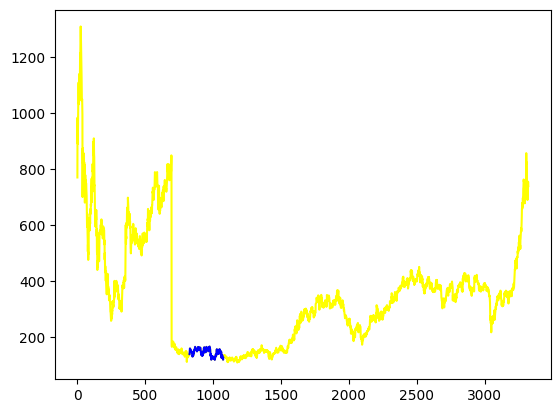

In [21]:
pl = df['Open'].plot(c="yellow")
Stockprice_One_Year['Open'].plot(ax=pl,c="blue")

Observation :

For the Economic Year 2011 - 2012 Open of Adani Port's Range is in Betwween 100-200, where as latter year it increases a lot. from which we can conclude the Company has faced positive impact in stock market.

np.float64(170.45)

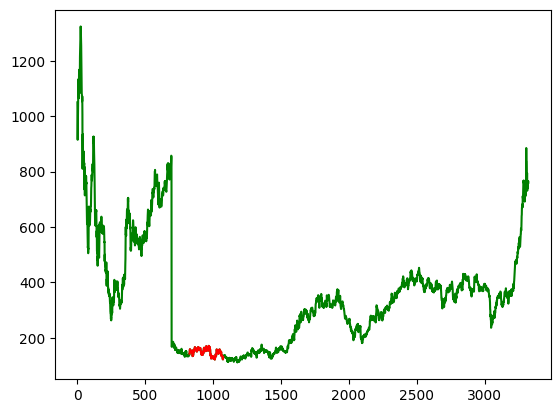

In [22]:
pl = df['High'].plot(c="green")
Stockprice_One_Year['High'].plot(ax=pl,c="red")

Stockprice_One_Year['High'].max()

Observation :

For the Economic Year 2011 - 2012 High Stock Price of Adani Port's is 170.45

163.55


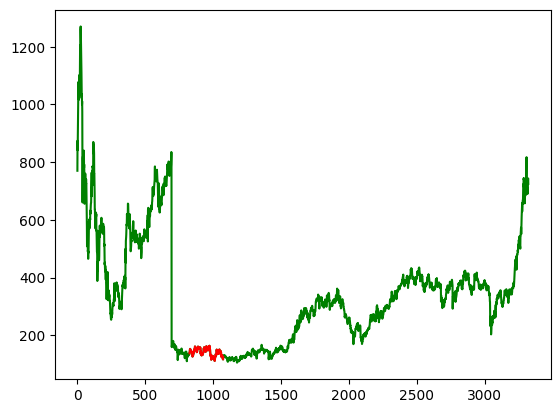

In [23]:
pl = df['Low'].plot(c="green")
Stockprice_One_Year['Low'].plot(ax=pl,c="red")

print(Stockprice_One_Year['Low'].max())

Observation :

For the Economic Year 2011 - 2012 Low Stock Price of Adani Port's is 163.55

115.0 165.4


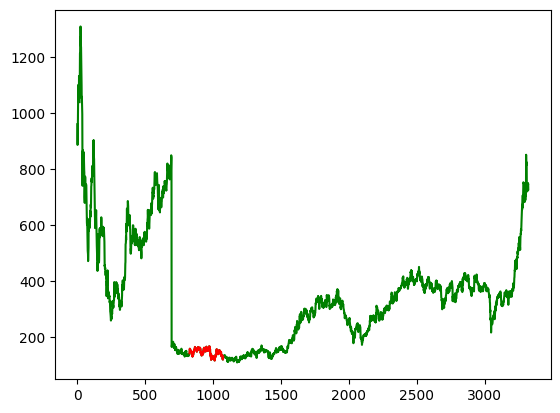

In [24]:
pl = df['Last'].plot(c="green")
Stockprice_One_Year['Last'].plot(ax=pl,c="red")

print(Stockprice_One_Year['Last'].min(),Stockprice_One_Year['Last'].max())

Observation :

For the Economic Year 2011 - 2012 Last of Adani Port's Range is in Betwween 115.0-165.4


114.7 165.0


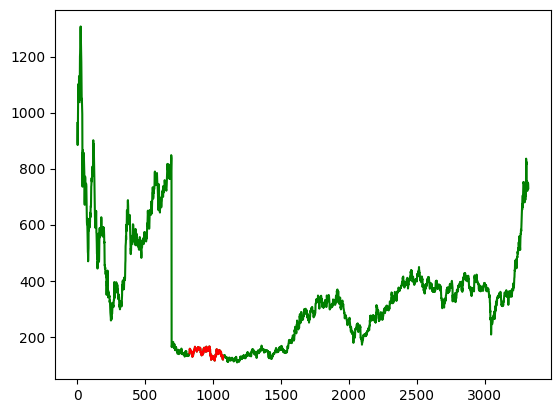

In [25]:
pl = df['Close'].plot(c="green")
Stockprice_One_Year['Close'].plot(ax=pl,c="red")

print(Stockprice_One_Year['Close'].min(),Stockprice_One_Year['Close'].max())

Observation :

For the Economic Year 2011 - 2012 Close of Adani Port's Range is in Betwween 114.7-165.0


(np.float64(115.9), np.float64(166.37))

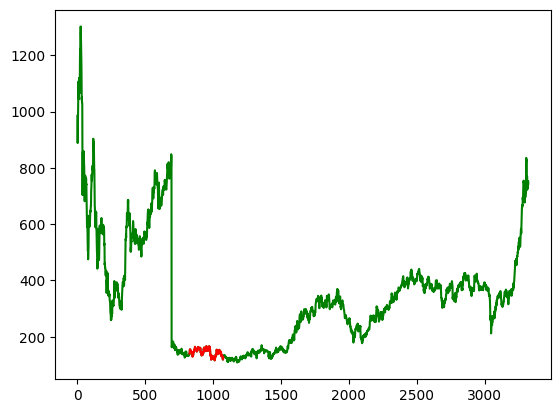

In [26]:
pl = df['VWAP'].plot(c="green")
Stockprice_One_Year['VWAP'].plot(ax=pl,c="red")

Stockprice_One_Year['VWAP'].min(),Stockprice_One_Year['VWAP'].max()

Observation :

For the Economic Year 2011 - 2012 VWAP(Volume Weighted Average Price) of Adani Port's Range is in Betwween 115.9-166.37


##### 4.2. Now, let's check wherher matplotlib's plotting is better in looks. Once the plotting is done, Check what is the impact in plots, if you execute the line of code: plt.style.use('fivethirtyeight')

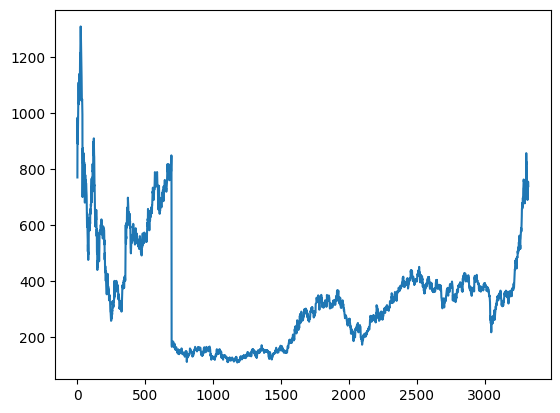

In [27]:
plt.plot(df["Open"])

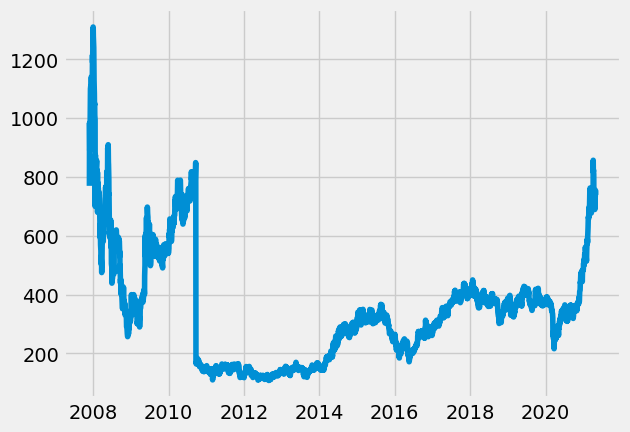

In [65]:
plt.style.use('fivethirtyeight')
plt.plot(df["Open"])

Observation :

plt.style.use("fivethirtyeight") use gives more clarity in Visualization.


##### 4.3. Let's find the Correlation between the features. make a correlation Heatmap. Write your Observations about the same.

In [29]:
Stockprice_One_Year_corr = Stockprice_One_Year.drop(columns=["Date","Symbol","Series"])
# for easy to get Correlation Heatmap 

<Axes: >

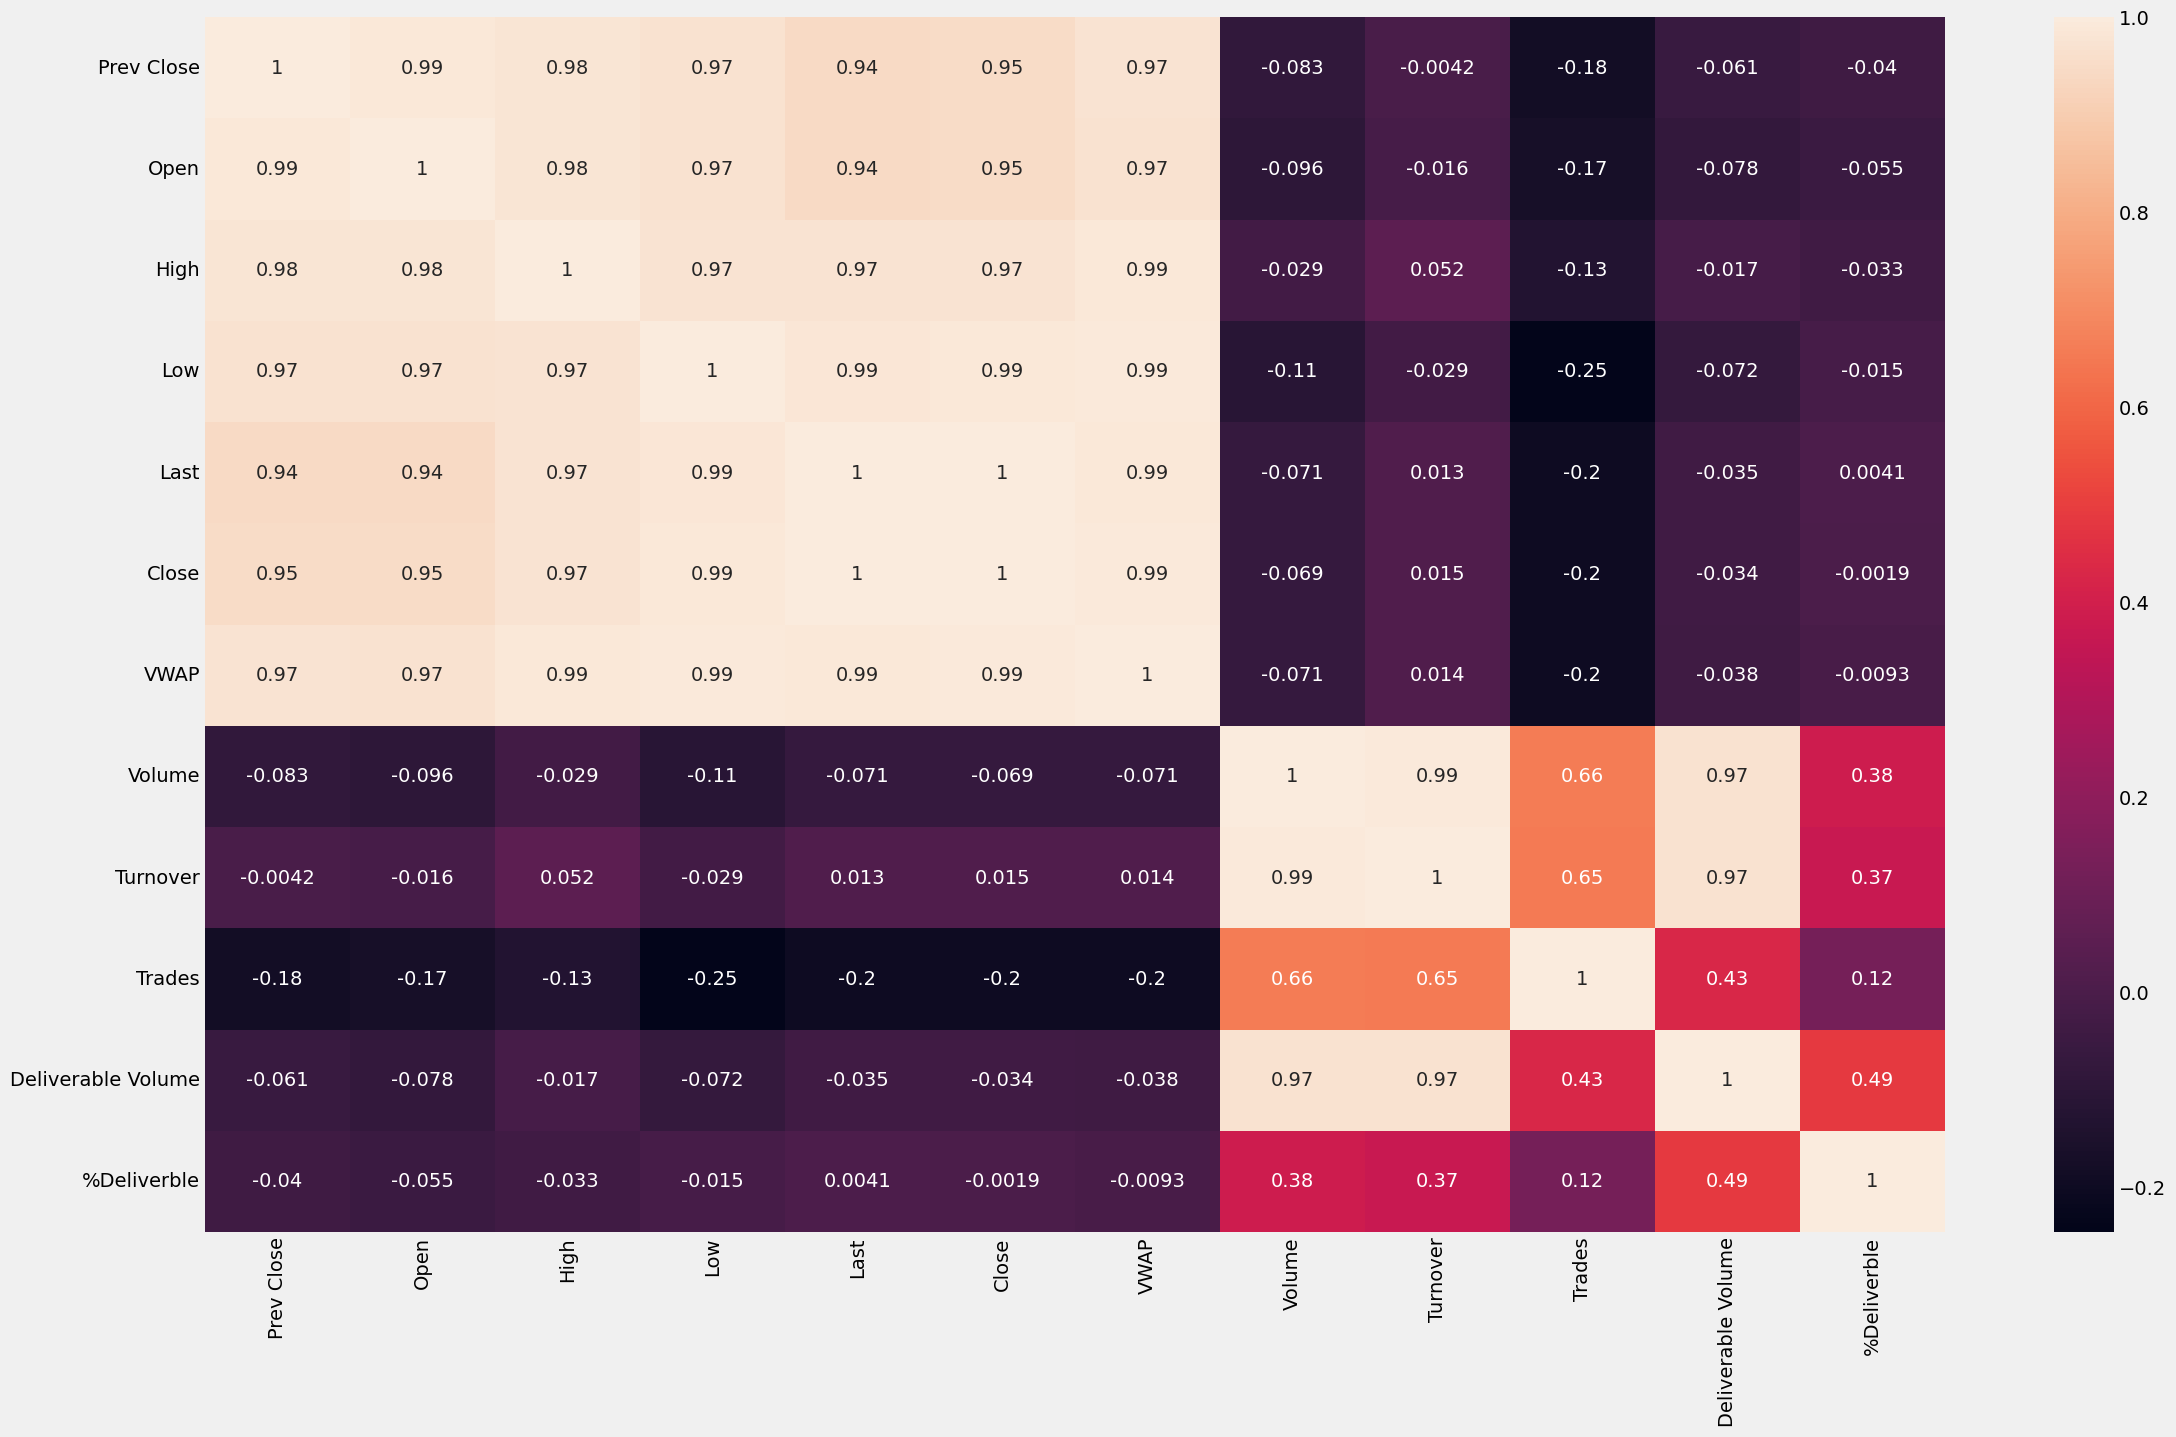

In [30]:
plt.figure(figsize=(25,15))
sns.heatmap(Stockprice_One_Year_corr.corr(method="pearson"),annot=True)

##### 4.4. How can you plot multiple features in single plot ? For Instance, Use a red line For "LOW" ,Green line for "HIGH", and Black line for "CLOSE"

<Axes: xlabel='Date'>

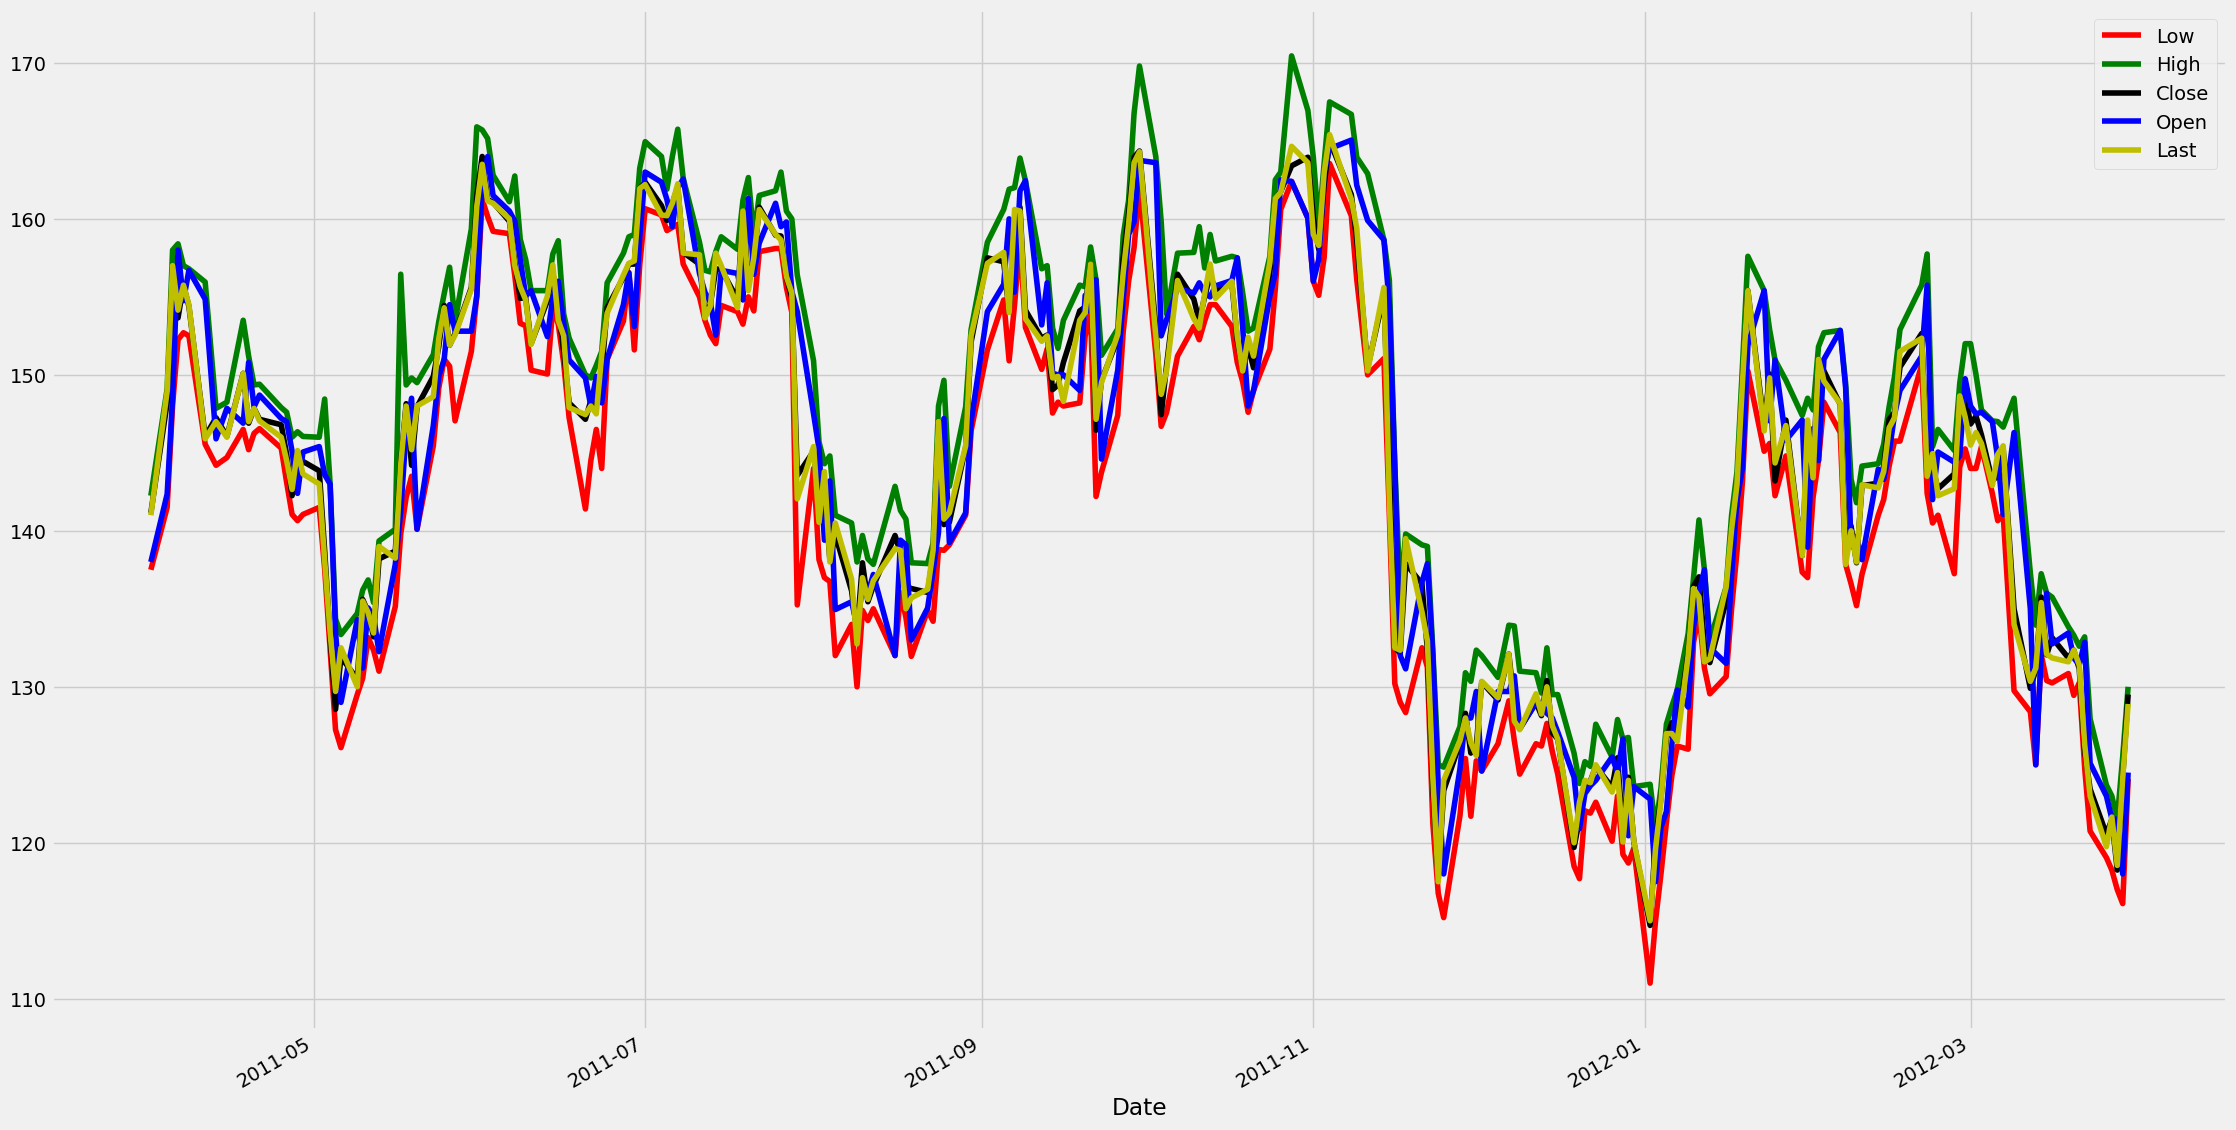

In [31]:
Stockprice_One_Year.plot(x="Date",y=["Low","High","Close","Open","Last"],color = ["r","g","k","b","y"],figsize = [25,15])

##### 4.5. Now, What does plt.fill_between() do? can you shade the region between LOW and HIGH ?

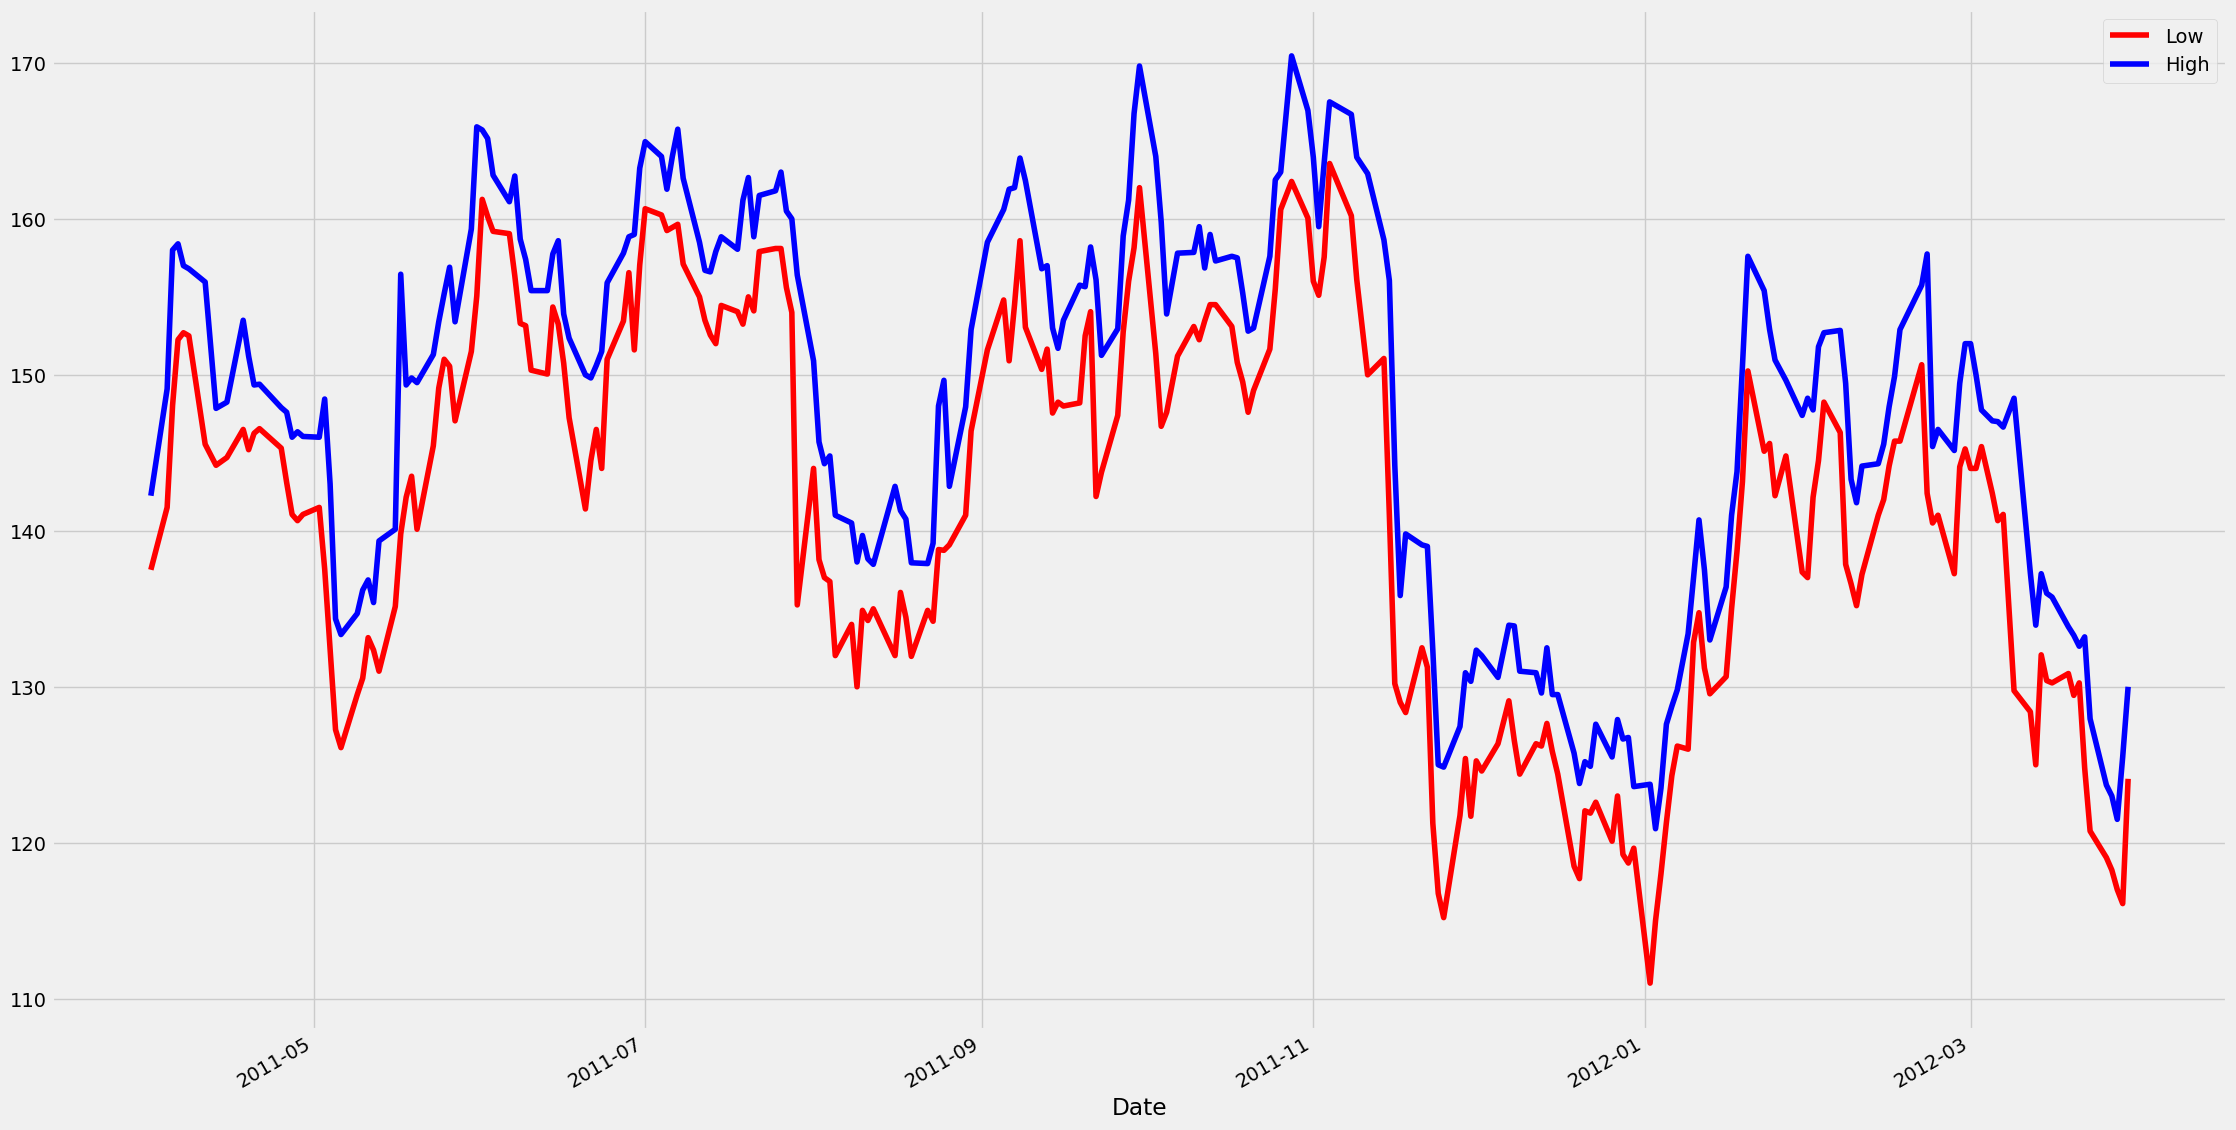

In [32]:
Stockprice_One_Year.plot(x="Date", y=["Low","High"],color=["r","b"],figsize=[25,15])
plt.show()

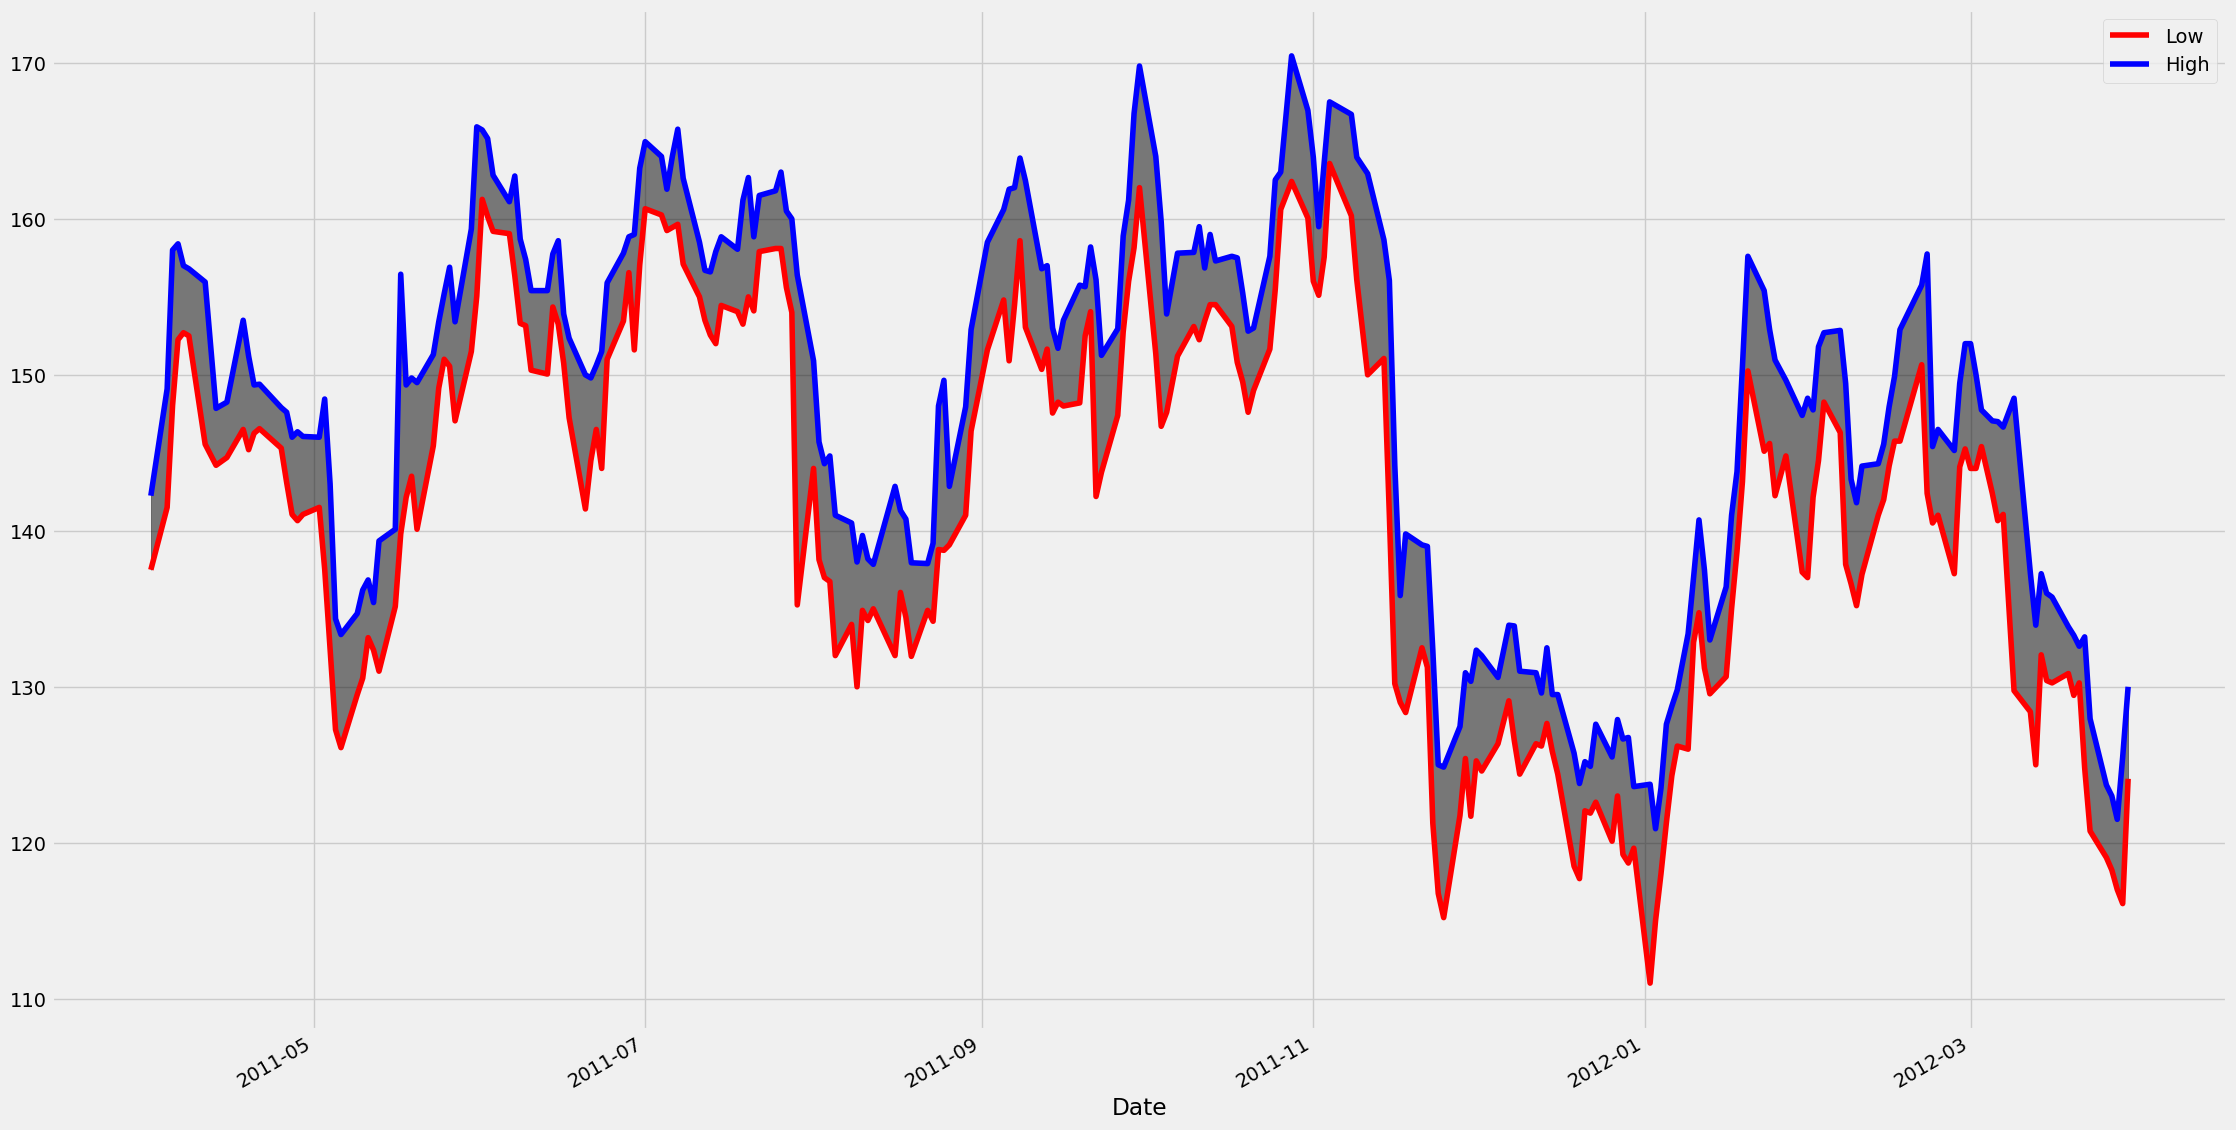

In [33]:
Stockprice_One_Year.plot(x="Date",y=["Low","High"],color = ["r","b"],figsize = [25,15])
plt.fill_between(Stockprice_One_Year["Date"],Stockprice_One_Year["Low"],Stockprice_One_Year["High"],color="k",alpha=0.5)
plt.show()

##### 4.6.Does BoxPlot Signify Something For The Sampled Dataset ?

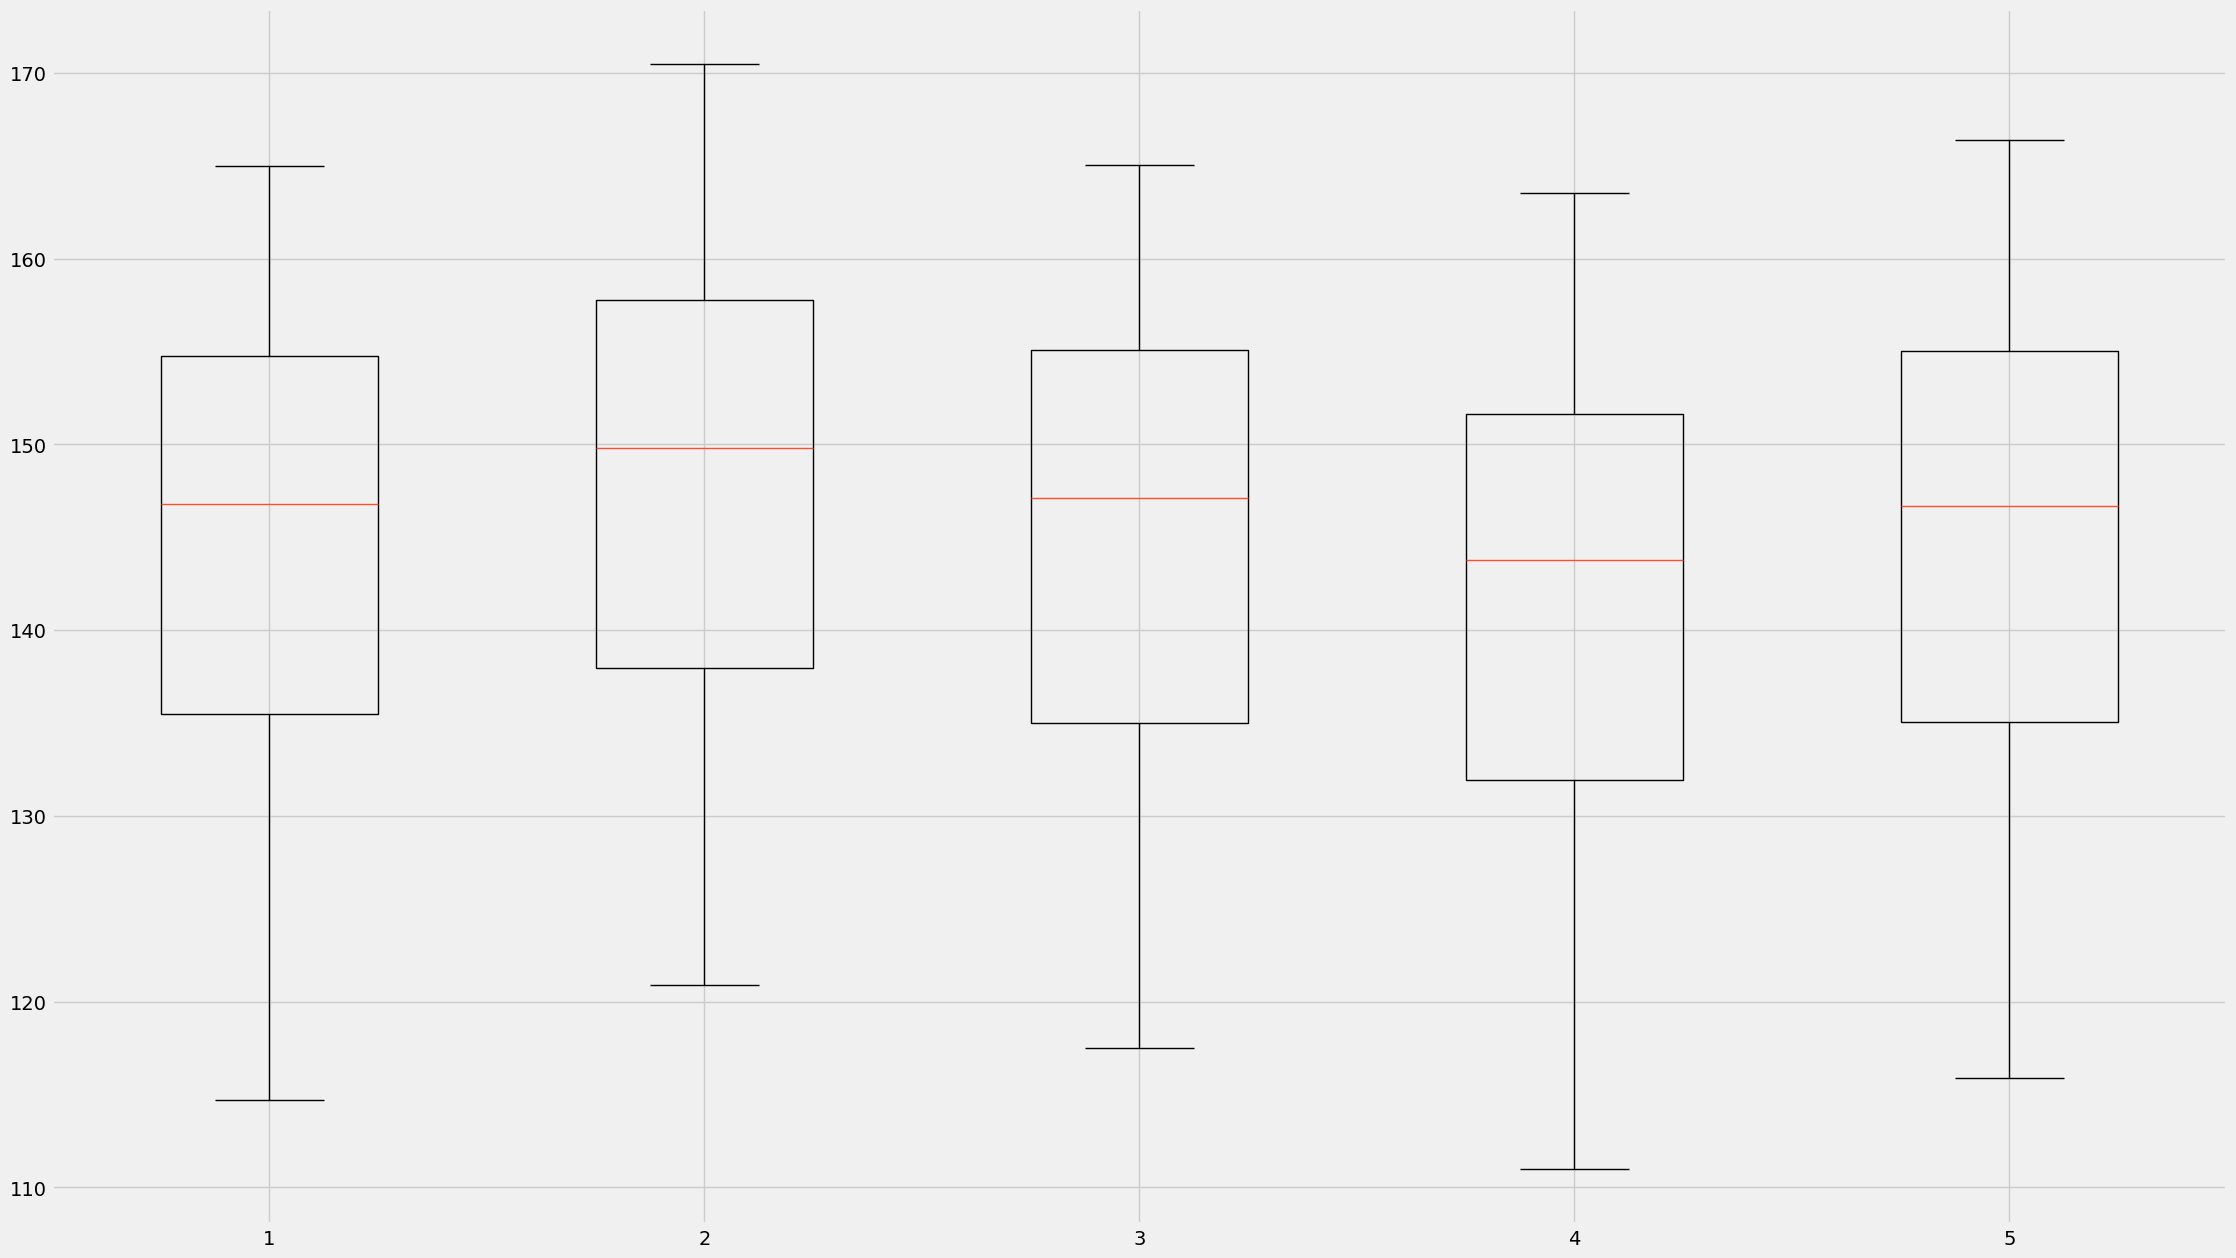

In [34]:
plt.figure(figsize=(25,15))
plt.boxplot(Stockprice_One_Year[['Close',"High","Open","Low","VWAP"]])
plt.show()

PLOTTNG MOVING AVEARGES

In [35]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()   # 50 day moving average
df['SMA_200'] = df['Close'].rolling(window=200).mean()   #200 day moving average

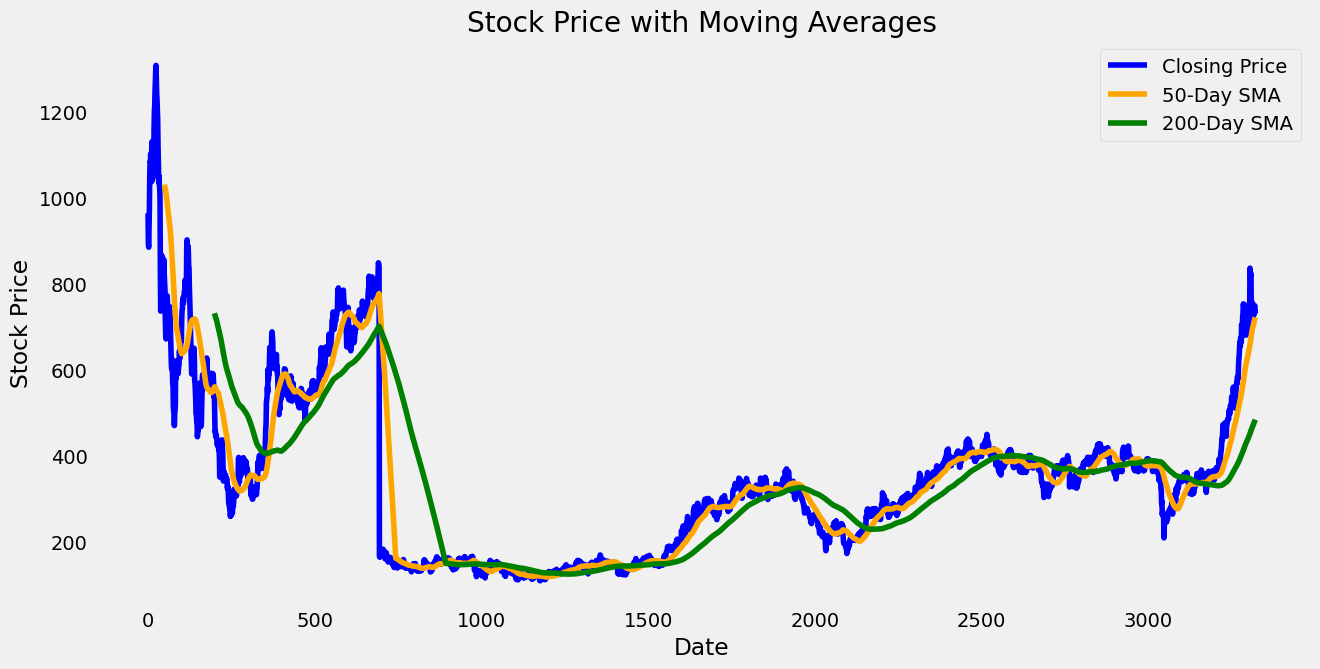

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(df['SMA_200'], label='200-Day SMA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# 5. Feature Engineering 

#####  5.1. Generating New Features Based On Important Features

In [37]:
data = df[["Date","Open","High","Low","Volume","VWAP"]]


##### 5.2. Setting Index as Date

In [38]:
df.set_index("Date",drop = False,inplace = True)

##### 5.3. Visual Representation Of Closing Price

<Axes: xlabel='Date'>

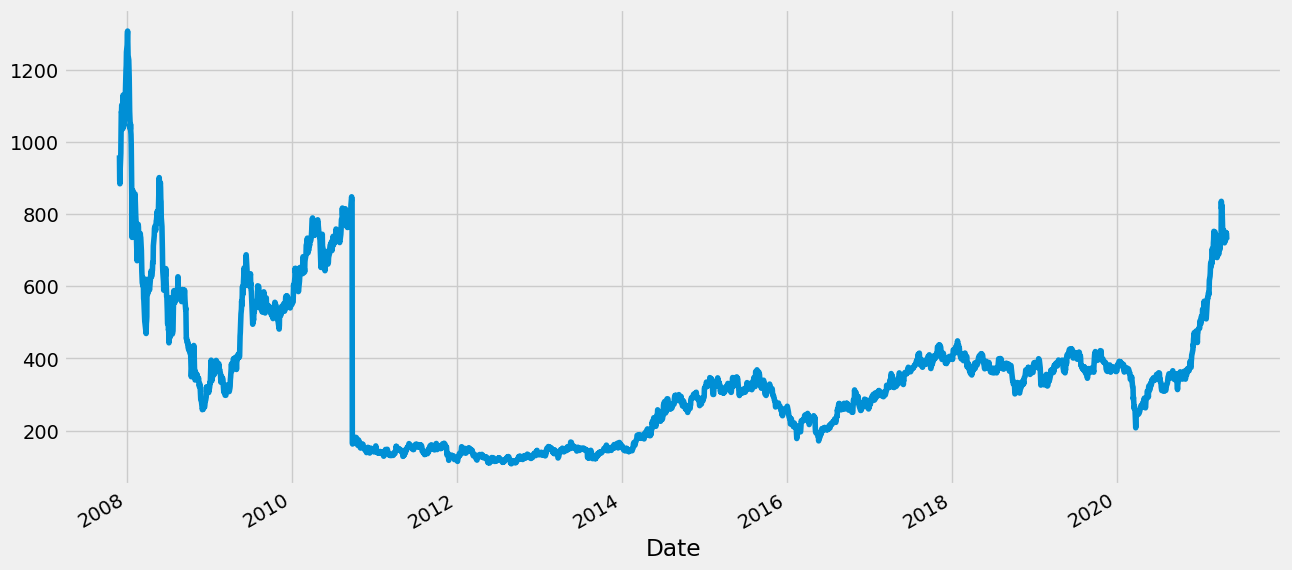

In [39]:
df.Close.plot(figsize=(14,7))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3322 non-null   datetime64[ns]
 1   Open    3322 non-null   float64       
 2   High    3322 non-null   float64       
 3   Low     3322 non-null   float64       
 4   Volume  3322 non-null   int64         
 5   VWAP    3322 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 155.8 KB


#####  5.4. Select Data For Regression

In [41]:

X = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume']].values
y = df['VWAP'].values

In [42]:
X

array([[4.4000000e+02, 7.7000000e+02, 1.0500000e+03, ..., 9.5900000e+02,
        9.6290000e+02, 2.7294366e+07],
       [9.6290000e+02, 9.8400000e+02, 9.9000000e+02, ..., 8.8500000e+02,
        8.9390000e+02, 4.5813380e+06],
       [8.9390000e+02, 9.0900000e+02, 9.1475000e+02, ..., 8.8700000e+02,
        8.8420000e+02, 5.1241210e+06],
       ...,
       [7.4915000e+02, 7.5500000e+02, 7.6000000e+02, ..., 7.4340000e+02,
        7.4625000e+02, 1.1156977e+07],
       [7.4625000e+02, 7.5320000e+02, 7.6585000e+02, ..., 7.4640000e+02,
        7.4675000e+02, 1.3851910e+07],
       [7.4675000e+02, 7.3900000e+02, 7.5945000e+02, ..., 7.2640000e+02,
        7.3005000e+02, 1.2600934e+07]], shape=(3322, 7))

In [43]:
y

array([984.72, 941.38, 888.09, ..., 751.02, 753.06, 743.35], shape=(3322,))

# 6. Linear Regression 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:

#Splitting dataset 20%(Testing) - 80%(Training)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
     

LinearRegression()

In [46]:

print(model.coef_)

[-1.32235469e-02 -5.57413511e-02  4.52540249e-01  3.11198667e-01
 -3.84158379e-01  6.88434813e-01 -3.47794974e-08]


In [47]:

print(model.intercept_)

-0.13754709960647915


In [48]:

Lr_score = model.score(X_test, y_test)
Lr_score

0.9998733668236501

# 7. Gradient Boosting

In [ ]:

from sklearn import ensemble
# 400-tree boosted model, each with max depth 5, learning slowly with a rate of 0.1, and you're allowing small splits with min_samples_split=2
gboost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1)
gboost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [50]:

Gboost_score = gboost.score(X_test, y_test)
Gboost_score
     

0.9996352394001172

# 8. XGBoost Regression 

In [51]:
#pip install xgboost

In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


In [53]:
xgb = XGBRegressor()
print(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [54]:

xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

0.9999803530758932

In [55]:

XGBoost_score = xgb.score(X_test,y_test)
XGBoost_score

0.9984845469011943

In [56]:
y_predicted = xgb.predict(X_test)
y_predicted

array([ 115.02862 ,  151.3925  ,  342.76944 ,  239.70633 ,  426.22534 ,
        158.03496 ,  892.7399  ,  359.61612 ,  270.28943 ,  151.1534  ,
        556.85016 ,  356.5944  ,  303.59995 ,  595.6932  ,  284.44955 ,
        271.40598 ,  313.6894  , 1203.5887  ,  152.6077  ,  258.32996 ,
        702.4941  ,  260.8454  ,  371.09045 ,  741.5447  ,  355.96826 ,
        749.34064 ,  298.71042 ,  284.13123 ,  154.96664 ,  324.45105 ,
        183.41028 ,  545.2577  ,  382.0177  ,  565.74524 , 1051.9578  ,
        486.69495 ,  220.87892 ,  299.31958 ,  249.7677  ,  149.76532 ,
        344.82837 ,  390.52878 ,  370.9395  ,  123.57635 ,  292.89795 ,
        385.50592 ,  404.27237 ,  556.1089  ,  323.91327 ,  132.2064  ,
        529.76556 ,  139.69894 ,  348.417   ,  136.50916 ,  733.6284  ,
        791.4764  ,  315.82758 ,  122.14139 ,  302.59717 ,  370.51703 ,
        162.9135  ,  312.35117 ,  317.02338 ,  602.8477  ,  128.1985  ,
        112.74617 ,  144.93953 ,  341.84637 ,  513.4415  ,  356.

In [57]:
print("Linear Regression Accuracy : ", Lr_score)
print("Gradient Boost Regression Accuracy : ", Gboost_score)
print("XGBoost Regression Accuracy : ", XGBoost_score)

Linear Regression Accuracy :  0.9998733668236501
Gradient Boost Regression Accuracy :  0.9996352394001172
XGBoost Regression Accuracy :  0.9984845469011943


In [58]:
import warnings 
warnings.filterwarnings('ignore')

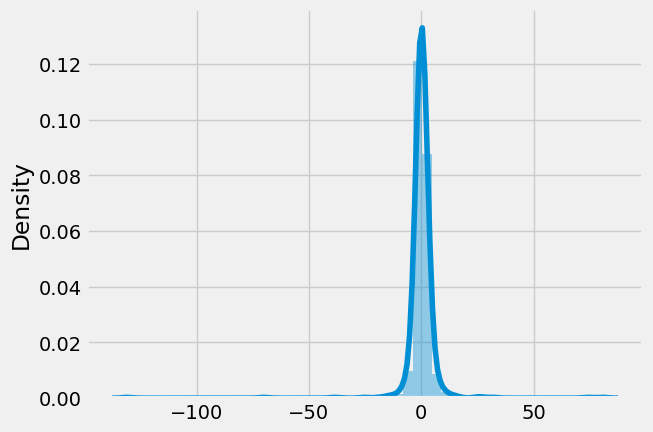

In [59]:
sns.distplot((y_test-y_predicted),bins=50);

In [60]:
#pip install joblib

In [61]:
import joblib
joblib.dump(xgb, "xgboost_model.pkl")

['xgboost_model.pkl']